### Lab 3

In [ ]:
from typing import NamedTuple

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

import sympy as sp
import scipy
import math
from scipy.stats import norm, chi2
import scipy.stats as stats


from IPython.display import display as ipydisplay, Math

In [2]:
class LinearCongruentialGenerator:
    seed = 42
    alpha = 1664525
    c = 1013904223
    m = 2 ** 32
    x_current = seed
     
    @staticmethod
    def random():
        LinearCongruentialGenerator.x_current = (LinearCongruentialGenerator.alpha * LinearCongruentialGenerator.x_current + LinearCongruentialGenerator.c) % LinearCongruentialGenerator.m
        return LinearCongruentialGenerator.x_current / LinearCongruentialGenerator.m
    
rand = LinearCongruentialGenerator().random


### Task 1
Write a program that implements a method for generating a two-dimensional random variable (RV) with a specified distribution.

Conduct a statistical investigation:

- Check the components of the two-dimensional RV for independence;
- Find the conditional density distributions;
- Construct histograms of the components of the two-dimensional RV and plot their density distributions in a single coordinate system;
- Construct a histogram of the two-dimensional RV distribution and plot the density distribution in a single coordinate system (3D plot);
- Calculate the theoretical, point, and interval values of the characteristics of the two-dimensional RV (expected value, variance, correlation);
- *Test statistical hypotheses regarding the conformity of the obtained estimates of the characteristics (expected value, variance, correlation) of the random variable to the theoretical ones.

In [3]:
f_str = '0.5 * sin(x+y)'
f_sp = sp.sympify(f_str)
f = sp.lambdify(sp.symbols('x, y'), f_sp)
x_sp, y_sp = sp.symbols('x y')

ipydisplay(Math(f'f(x, y) = {f_sp}'))

<IPython.core.display.Math object>

In [4]:
class Pdf2dBundle(NamedTuple):
    pdf: callable
    x1: float
    x2: float
    y1: float
    y2: float

f_bundle = Pdf2dBundle(
    pdf=f,
    x1=0,
    x2=np.pi/2,
    y1=0,
    y2=np.pi/2,
)

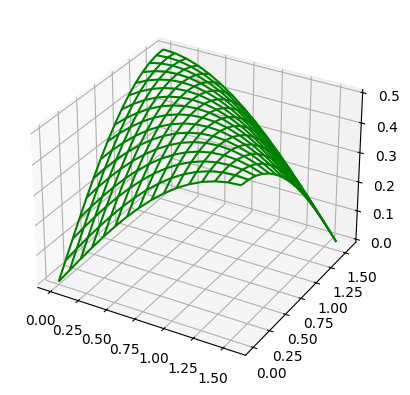

In [ ]:
node_count = 16

x_list = np.linspace(
    f_bundle.x1,
    f_bundle.x2,
    node_count,
)
y_list = np.linspace(
    f_bundle.y1,
    f_bundle.y2,
    node_count,
)
X, Y = np.meshgrid(x_list, y_list)
Z = f(X, Y)

fig = plt.figure(label='Distribution density')
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')

plt.show()

In [6]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [7]:
integral_value = sp.integrate(
    f_sp,
    (x_sp, f_bundle.x1, f_bundle.x2),
    (y_sp, f_bundle.y1, f_bundle.y2),
)

ipydisplay(Math(f'\\int_{{0}}^{{\\pi/2}} \\int_{{0}}^{{\\pi/2}} {f_str} \,dx dy = {round(float(integral_value), 2)}'))

<IPython.core.display.Math object>

### Check the components of the two-dimensional RV for independence;

$(f(x, y) = f(x) * f(y) \rightarrow X, Y independent)$

In [8]:
f_x_sp = sp.integrate(
    f_sp,
    (y_sp, f_bundle.x1, f_bundle.x2)
)
f_x = sp.lambdify(
    sp.symbols('x'),
    f_x_sp,
)

f_y_sp = sp.integrate(
    f_sp,
    (x_sp, f_bundle.y1, f_bundle.y2)
)
f_y = sp.lambdify(
    sp.symbols('y'),
    f_y_sp,
)

ipydisplay(Math(f'f(x) = {sp.latex(sp.simplify(f_x_sp))}'))
ipydisplay(Math(f'f(y) = {sp.latex(sp.simplify(f_y_sp))}'))

multiplied_sp = sp.Mul(f_x_sp, f_y_sp)
multiplied = sp.lambdify(sp.symbols('x, y'), multiplied_sp)
ipydisplay(Math(f'f(x)*f(y) = {sp.latex(sp.simplify(multiplied_sp))}'))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[-0.25       -0.22249836 -0.19255898 -0.16050988 -0.1267022  -0.09150635
  -0.05530794 -0.01850355  0.01850355  0.05530794  0.09150635  0.1267022
   0.16050988  0.19255898  0.22249836  0.25      ]
 [-0.22249836 -0.19802208 -0.17137623 -0.14285274 -0.11276413 -0.08144005
  -0.0492237  -0.01646804  0.01646804  0.0492237   0.08144005  0.11276413
   0.14285274  0.17137623  0.19802208  0.22249836]
 [-0.19255898 -0.17137623 -0.14831584 -0.12363047 -0.09759059 -0.07048148
  -0.04260016 -0.0142521   0.0142521   0.04260016  0.07048148  0.09759059
   0.12363047  0.14831584  0.17137623  0.19255898]
 [-0.16050988 -0.14285274 -0.12363047 -0.10305369 -0.08134782 -0.05875069
  -0.03550988 -0.01188001  0.01188001  0.03550988  0.05875069  0.08134782
   0.10305369  0.12363047  0.14285274  0.16050988]
 [-0.1267022  -0.11276413 -0.09759059 -0.08134782 -0.06421379 -0.04637623
  -0.02803055 -0.00937776  0.00937776  0.02803055  0.04637623  0.06421379
   0.08134782  0.09759059  0.11276413  0.1267022 ]
 [-0.0

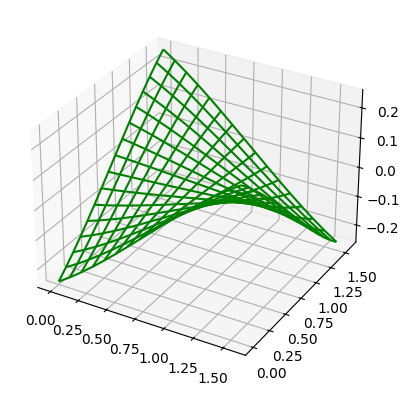

In [9]:
# Difference graph f(x, y) и f(x)*f(y):

Z = f(X, Y) - multiplied(X, Y)
print(Z)
fig = plt.figure(label='Sub f(x, y) & f(x)*f(y)')
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')

plt.show()

### 2. Find the conditional density distributions;

In [10]:
f_x_pipe_y_sp = f_sp / f_y_sp
f_y_pipe_x_sp = f_sp / f_x_sp

ipydisplay(Math(f'f(x | y) = {sp.latex(sp.simplify(f_x_pipe_y_sp))}'))
ipydisplay(Math(f'f(y | x) = {sp.latex(sp.simplify(f_y_pipe_x_sp))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 3. Construct histograms of the components of the two-dimensional RV and plot their density distributions in a single coordinate system

In [11]:
sample_size = 1_000_000

def generate_sample(pdf_bundle: Pdf2dBundle, sample_size=sample_size):
    sample = []
    while len(sample) < sample_size:
        x = pdf_bundle.x1 + rand() * (pdf_bundle.x2 - pdf_bundle.x1)
        y = pdf_bundle.y1 + rand() * (pdf_bundle.y2 - pdf_bundle.y1)
        z = rand()
        if z < pdf_bundle.pdf(x, y):
            sample.append((x, y))
    return sample

In [12]:
sample = generate_sample(f_bundle)
x_sample = [el[0] for el in sample]
y_sample = [el[1] for el in sample]

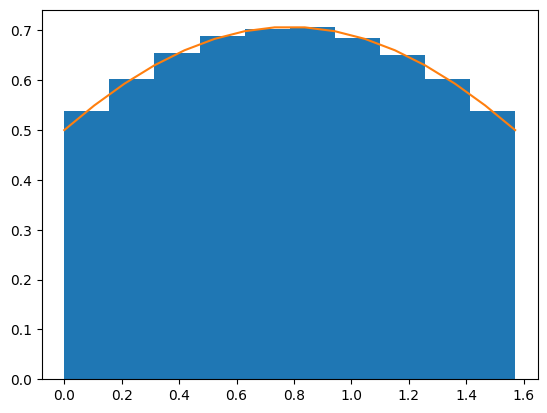

In [13]:
fig = plt.figure(label='Histogram 1')

plt.hist(
    x_sample,
    density=True,
    bins=10,
)
plt.plot(
    x_list,
    f_x(x_list),
)
plt.show()

In [14]:
plt.clf()

<Figure size 640x480 with 0 Axes>

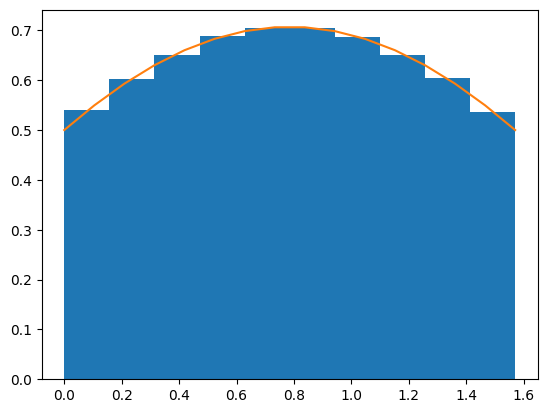

In [15]:
fig = plt.figure(label='Histogram 2')

plt.hist(
    y_sample,
    density=True,
    bins=10,
)
plt.plot(
    y_list,
    f_y(y_list),
)
plt.show()

### 4. Construct a histogram of the two-dimensional RV distribution and plot the density distribution in a single coordinate system (3D plot)

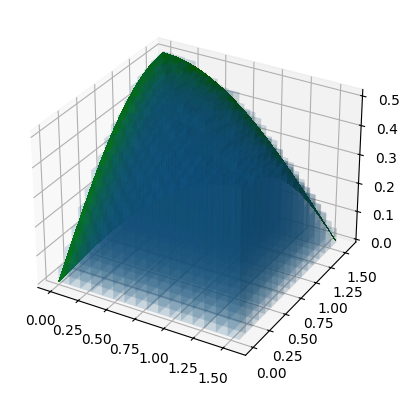

In [16]:
fig = plt.figure(label='Histogram with Density Plot')
ax = fig.add_subplot(111, projection='3d')

bin_count = 16

x_bin_width = (f_bundle.x2 - f_bundle.x1) / bin_count
y_bin_width = (f_bundle.y2 - f_bundle.y1) / bin_count

hist, x_edges, y_edges = np.histogram2d(
    x_sample, y_sample,
    bins=bin_count,
    range=[
        [f_bundle.x1, f_bundle.x2],
        [f_bundle.y1, f_bundle.y2],
    ],
)

x_pos, y_pos = np.meshgrid(
    x_edges[:-1],
    y_edges[:-1],
)

hist = hist / sample_size / x_bin_width / y_bin_width
heights = hist.flatten()

ax.bar3d(
    x_pos.flatten(), y_pos.flatten(), np.zeros(len(heights)),
    x_bin_width, y_bin_width, heights,
    alpha=0.1
)
Z = f(X, Y)
ax.plot_surface(
    X, Y, Z,
    color='green',
    antialiased=False
)

plt.show()

### 5. Calculate the theoretical, point, and interval values of the characteristics of the two-dimensional RV

- \+ mean
- \+ variance
- \+ standard deviation
- \+ correlation
- \+ confidence interval for mean
- \+ confidence interval for variance

In [17]:
# expected and expected mean:

expected_mean = (
    scipy.integrate.dblquad(
        lambda x, y: x * f(x, y),
        f_bundle.x1, f_bundle.x2,
        f_bundle.y1, f_bundle.y2
    )[0],
    scipy.integrate.dblquad(
        lambda x, y: y * f(x, y),
        f_bundle.x1, f_bundle.x2,
        f_bundle.y1, f_bundle.y2
    )[0]
)
observed_mean = (
    np.mean(x_sample),
    np.mean(y_sample),
)

print(f'expected mean: {expected_mean}')
print(f'observed mean: {observed_mean}')

expected mean: (0.7853981633974483, 0.7853981633974483)
observed mean: (np.float64(0.7852500142434925), np.float64(0.7849554096811043))


In [18]:
# expected and observed variance:

expected_variance = (
    scipy.integrate.dblquad(
        lambda x, y: (x - expected_mean[0])**2 * f(x, y),
        f_bundle.x1, f_bundle.x2,
        f_bundle.y1, f_bundle.y2,
    )[0],
    scipy.integrate.dblquad(
        lambda x, y: (y - expected_mean[1])**2 * f(x, y),
        f_bundle.x1, f_bundle.x2,
        f_bundle.y1, f_bundle.y2,
    )[0],
)

observed_variance = (
    np.var(x_sample),
    np.var(y_sample),
)

print(f'expected variance: {expected_variance}')
print(f'observed variance: {observed_variance}')

print(f'expected standard deviation: {expected_variance[0]**0.5, expected_variance[1]**0.5}')
print(f'observed standard deviation: {observed_variance[0]**0.5, observed_variance[1]**0.5}')

expected variance: (0.18764660186298152, 0.18764660186298154)
observed variance: (np.float64(0.18773088248682687), np.float64(0.1878540150790233))
expected standard deviation: (0.43318195006599886, 0.43318195006599886)
observed standard deviation: (np.float64(0.4332792200034833), np.float64(0.43342129052346207))


In [19]:
# expected and observed correlation:

expected_r_xy = scipy.integrate.dblquad(
    lambda x, y: ((x - expected_mean[0]) *
                  (y - expected_mean[1]) *
                  f(x, y)),
    f_bundle.x1, f_bundle.x2,
    f_bundle.y1, f_bundle.y2,
)[0] / np.sqrt(expected_variance[0] * expected_variance[1])

x_sample_centered = x_sample - observed_mean[0]
y_sample_centered = y_sample - observed_mean[1]

observed_r_xy = ((x_sample_centered @ y_sample_centered)
                 / (len(x_sample)
                    * np.sqrt(observed_variance[0]
                              * observed_variance[1])))

print(f'expected r_xy: {expected_r_xy}')
print(f'observed r_xy: {observed_r_xy}')

expected r_xy: -0.245429162137541
observed r_xy: -0.24677440877040877


In [20]:
gamma = 0.95
hypothesis_error_value = 0.05

# confidence interval
def get_delta(offset):
    t = norm.ppf(gamma / 2 + 0.5)
    return t * offset / np.sqrt(sample_size) # Margin of Error

def get_offset_delta(test_offset): # build confidence level
    alphas = ((1 - gamma) / 2, (1 + gamma) / 2)
    chis = (chi2.isf(alphas, sample_size - 1))
    temp = np.sqrt(sample_size - 1) * test_offset
    
    return (temp / np.sqrt(chis[0]), temp / np.sqrt(chis[1]))

In [21]:
theoretical_std_deviation_x = expected_variance[0]**0.5
theoretical_std_deviation_y = expected_variance[1]**0.5

sample_std_deviation_x = observed_variance[0]**0.5
sample_std_deviation_y = observed_variance[1]**0.5

delta_x = get_delta(theoretical_std_deviation_x)
delta_y = get_delta(theoretical_std_deviation_y)
offset_delta_x = get_offset_delta(sample_std_deviation_x)
offset_delta_y = get_offset_delta(sample_std_deviation_y)

val_x = np.square(offset_delta_x)
val_y = np.square(offset_delta_y)

print(f'confidence interval x for mean: {observed_mean[0]-delta_x, observed_mean[0]+delta_x}')
print(f'confidence interval y for mean: {observed_mean[1]-delta_y, observed_mean[1]+delta_y}')

print(f'confidence interval x for variance: {val_x}')
print(f'confidence interval y for variance: {val_y}')

confidence interval x for mean: (np.float64(0.7844009932226104), np.float64(0.7860990352643746))
confidence interval y for mean: (np.float64(0.7841063886602222), np.float64(0.7858044307019865))
confidence interval x for variance: [0.18721161 0.18825233]
confidence interval y for variance: [0.18733441 0.1883758 ]


### 6. *Test statistical hypotheses regarding the conformity of the obtained estimates of the characteristics (expected value, variance, correlation) of the random variable to the theoretical ones

In [22]:
chi2_x = (observed_mean[0] - expected_mean[0])**2 / theoretical_std_deviation_x**2

chi2_y = (observed_mean[1] - expected_mean[1])**2 / theoretical_std_deviation_y**2

alpha = 0.05
df = 1 

critical_value = stats.chi2.ppf(1 - alpha, df)
print(f'Chi-squared test for mean x: Chi2 = {chi2_x}, Critical value = {critical_value}')
print(f'Chi-squared test for mean y: Chi2 = {chi2_y}, Critical value = {critical_value}')

# hypothesis Testing
if chi2_x > critical_value:
    print("The hypothesis about the conformity of the expected value for x is rejected.")
else:
    print("The hypothesis about the conformity of the expected value for x is accepted.")

if chi2_y > critical_value:
    print("The hypothesis about the conformity of the expected value for y is rejected.")
else:
    print("The hypothesis about the conformity of the expected value for y is accepted.")

Chi-squared test for mean x: Chi2 = 1.1696546380221425e-07, Critical value = 3.841458820694124
Chi-squared test for mean y: Chi2 = 1.0446810727727247e-06, Critical value = 3.841458820694124
The hypothesis about the conformity of the expected value for x is accepted.
The hypothesis about the conformity of the expected value for y is accepted.


In [23]:
chi2_var_x = ((observed_variance[0] * (sample_size - 1)) / (theoretical_std_deviation_x**2)) - (sample_size - 1)

chi2_var_y = ((observed_variance[1] * (sample_size - 1)) / (theoretical_std_deviation_y**2)) - (sample_size - 1)

df = sample_size - 1  

critical_value = stats.chi2.ppf(1 - alpha, df)


if chi2_var_x > critical_value:
    print("The hypothesis about the conformity of the variance for x is rejected.")
else:
    print("The hypothesis about the conformity of the variance for x is accepted.")

if chi2_var_y > critical_value:
    print("The hypothesis about the conformity of the variance for y is rejected.")
else:
    print("The hypothesis about the conformity of the variance for y is accepted.")

The hypothesis about the conformity of the variance for x is accepted.
The hypothesis about the conformity of the variance for y is accepted.


### Task 2
Write a program that implements a method for generating a two-dimensional discrete random variable (DRV). You will define the distribution matrix of the DRV yourself.

Conduct a statistical investigation:

- Check the components of the two-dimensional DRV for independence;
- Find the conditional density distributions;
- Construct histograms of the components of the two-dimensional DRV;
- *Construct a histogram of the two-dimensional DRV distribution (3D plot);
- Calculate the theoretical, point, and interval values of the characteristics of the two-dimensional DRV (expected value, variance, correlation);
- *Test statistical hypotheses regarding the conformity of the obtained estimates of the characteristics (expected value, variance, correlation) of the random variable to the theoretical ones.

In [24]:
X = [1, 2, 3, 4, 5]
Y = [10, 20, 30, 40, 50]
P = [
        [0, 0, 0.05, 0.05, 0.1],
        [0.025, 0.025, 0.025, 0.025, 0.04],
        [0.05, 0.025, 0, 0, 0.1],
        [0.11, 0.07, 0.03, 0.05, 0.055],
        [0.070, 0.05, 0.05, 0, 0]
]

p_x = [sum(row) for row in P]
p_y = [sum(y) for y in zip(*P)]

p_yi = [[y / p_x[i] for y in row] for i, row in enumerate(P)]

F_x = np.cumsum(p_x)
F_y = [np.cumsum(p_yi[i]) for i in range(len(Y))]

In [25]:
def get_var_and_index(x, F_x, p):
    return next((x[i], i) for i, p_ in enumerate(F_x) if p_ >= p)

n = 10000

x_l, y_l = [], []
for _ in range(n):
    x, i = get_var_and_index(X, F_x, rand())
    x_l.append(x)
    y_l.append(get_var_and_index(Y, F_y[i], rand())[0])
    
p_x_imp = [x_l.count(X[i]) / n for i in range(len(X))]
p_y_imp = [y_l.count(Y[i]) / n for i in range(len(Y))]

In [26]:
r_theo = lambda M_xy, M_x, M_y, D_x, D_y: (M_xy - M_x * M_y) / math.sqrt(D_x * D_y)


M_f = lambda v, p_v: sum([v[i] * p_v[i] for i in range(len(v))])

def D_f(v, p_v, M=None):
    if M is None:
        M = M_f(v, p_v)
    return sum([(v[i] ** 2) * p_v[i] for i in range(len(v))]) - M ** 2

M_x = M_f(X, p_x)
M_y = M_f(Y, p_y)
M_xy = sum([
    sum([x * y * P[i][j] for j, y in enumerate(Y)])
    for i, x in enumerate(X)
])
D_x = D_f(X, p_x, M_x)
D_y = D_f(Y, p_y, M_y)

print('Theoretical values')
print('M[x] =', M_x, 'D[x] =', D_x)
print('M[y] =', M_y, 'D[y] =', D_y)
print('r[xy] =', r_theo(M_xy, M_x, M_y, D_x, D_y))
print()
print('Empirical values')
print('M[x] =', M_f(X, p_x_imp), 'D[x] =', D_f(X, p_x_imp))
print('M[y] =', M_f(Y, p_y_imp), 'D[y] =', D_f(Y, p_y_imp))
print('r =', stats.pearsonr(x_l, y_l)[0])


Theoretical values
M[x] = 3.115 D[x] = 1.9217749999999985
M[y] = 30.35 D[y] = 249.37749999999994
r[xy] = -0.47690403306892665

Empirical values
M[x] = 3.1430000000000002 D[x] = 1.9169509999999992
M[y] = 29.937 D[y] = 252.96603099999993
r = -0.4835839192116856


In [27]:
def draw_plot(v, p_v, p_v_imp, var_name):
    plt.plot(v, p_v, label='theoretical', color='gray', alpha=0.5, ls='--')
    plt.plot(v, p_v_imp, label=f'imperical', color='r', alpha=0.5)
    plt.title(f'{var_name} histogram')
    plt.legend()
    plt.show()

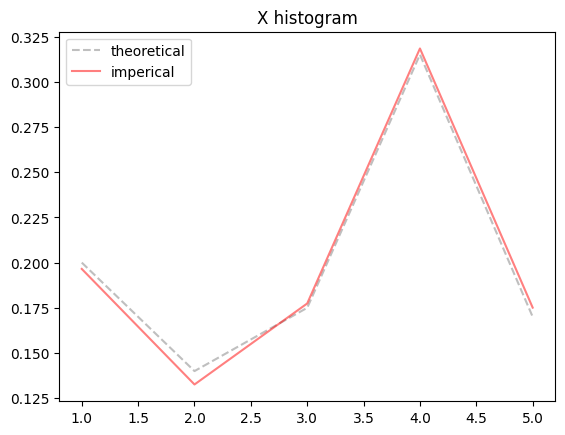

In [28]:
draw_plot(X, p_x, p_x_imp, 'X')

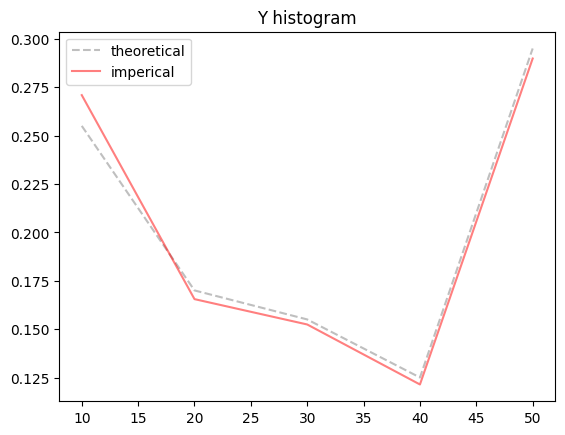

In [29]:
draw_plot(Y, p_y, p_y_imp, 'Y')

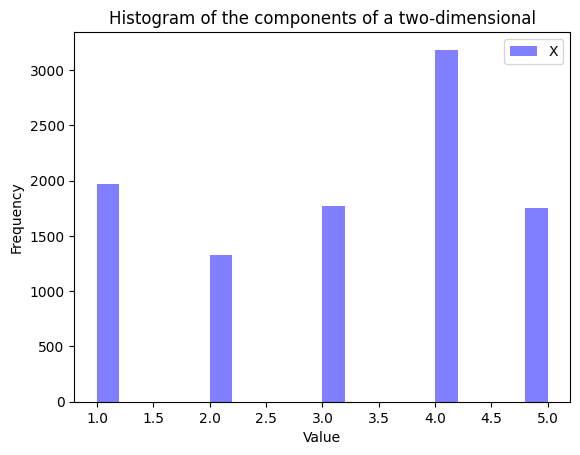

In [30]:
plt.hist(x_l, bins=20, alpha=0.5, color='b', label='X')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of the components of a two-dimensional')
plt.show()

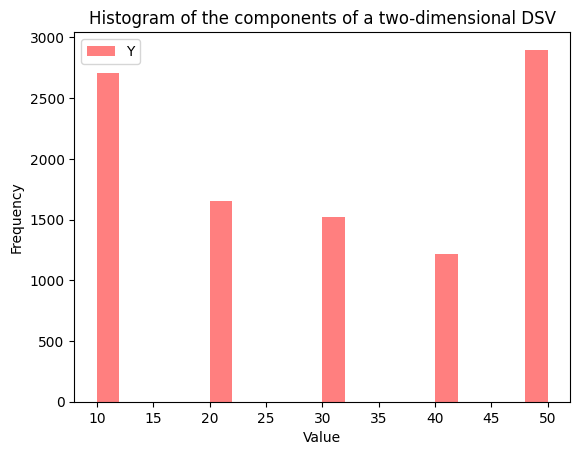

In [31]:
plt.hist(y_l, bins=20, alpha=0.5, color='r', label='Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of the components of a two-dimensional DSV')
plt.show()

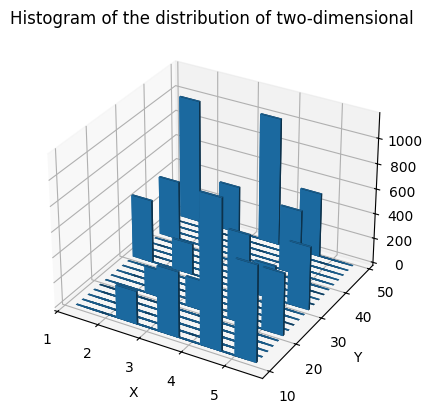

In [32]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x_l, y_l, bins=20)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")

xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap=cm.viridis)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogram of the distribution of two-dimensional')
plt.show()

In [33]:
independent = True
for i in range(len(X)):
    for j in range(len(Y)):
        joint_prob = P[i][j]
        marginal_prob = p_x[i] * p_y[j]
        if not np.isclose(joint_prob, marginal_prob):
            independent = False
            break
    if not independent:
        break

if independent:
    print("Components X and Y are independent")
else:
    print("Components X and Y are not independent")

Components X and Y are not independent


In [34]:
def conditional_density_X_given_Y(y):
    index_y = Y.index(y)
    conditional_probs = [P[index_y][i] / p_y[index_y] for i in range(len(X))]
    return conditional_probs

def conditional_density_Y_given_X(x):
    conditional_probs = [P[i][X.index(x)] / p_x[i] if x in X else 0 for i in range(len(Y))]
    return conditional_probs


conditional_density_X_given_Y_30 = conditional_density_X_given_Y(30)
conditional_density_Y_given_X_3 = conditional_density_Y_given_X(3)

print("Conditional density P(X|Y=30):", conditional_density_X_given_Y_30)
print("Conditional density P(Y|X=3):", conditional_density_Y_given_X_3)

Conditional density P(X|Y=30): [0.32258064516129026, 0.16129032258064513, 0.0, 0.0, 0.6451612903225805]
Conditional density P(Y|X=3): [0.25, 0.17857142857142858, 0.0, 0.09523809523809523, 0.29411764705882354]


In [35]:
observed_mean_x = M_f(X, p_x_imp)
observed_mean_y = M_f(Y, p_y_imp)
expected_mean_x = M_x
expected_mean_y = M_y

chi_squared_x = ((observed_mean_x - expected_mean_x) ** 2) / D_x
chi_squared_y = ((observed_mean_y - expected_mean_y) ** 2) / D_y

degrees_of_freedom = 1

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

if chi_squared_x > critical_value:
    print("Reject the null hypothesis for the expected value of X")
else:
    print("No grounds to reject the null hypothesis for the expected value of X")

if chi_squared_y > critical_value:
    print("Reject the null hypothesis for the expected value of Y")
else:
    print("No grounds to reject the null hypothesis for the expected value of Y")


No grounds to reject the null hypothesis for the expected value of X
No grounds to reject the null hypothesis for the expected value of Y


In [36]:
observed_variance_x =  D_f(X, p_x_imp)  
observed_variance_y = D_f(Y, p_y_imp)  

expected_variance_x = D_x
expected_variance_y = D_y

n = len(X)  
degrees_of_freedom = n - 1  
chi_squared_x = ((n - 1) * observed_variance_x) / expected_variance_x
chi_squared_y = ((n - 1) * observed_variance_y) / expected_variance_y

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

if chi_squared_x > critical_value:
    print("Reject the null hypothesis for the variance of X")
else:
    print("No grounds to reject the null hypothesis for the variance of X")

if chi_squared_y > critical_value:
    print("Reject the null hypothesis for the variance of Y")
else:
    print("No grounds to reject the null hypothesis for the variance of Y")

No grounds to reject the null hypothesis for the variance of X
No grounds to reject the null hypothesis for the variance of Y


In [37]:
observed_correlation = np.corrcoef(x_l, y_l)[0, 1] 
expected_correlation = r_theo(M_xy, M_x, M_y, D_x, D_y)

n = len(x_l) 
degrees_of_freedom = 1  
chi_squared = n * (observed_correlation - expected_correlation) ** 2

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

if chi_squared > critical_value:
    print("Reject the null hypothesis for correlation")
else:
    print("No grounds to reject the null hypothesis for correlation")

No grounds to reject the null hypothesis for correlation
